## Image Filtering and Template Matching in OpenCV

---

Prof. Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

Parts of this notebook are based on https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html, https://medium.com/analytics-vidhya/introduction-to-opencv-cc771730577a, https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html and https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81.



Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges). OpenCV provides different types of blurring techniques.

### 1. Averaging

This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. This is done by the function cv.blur() or cv.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of the kernel.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np 
import cv2

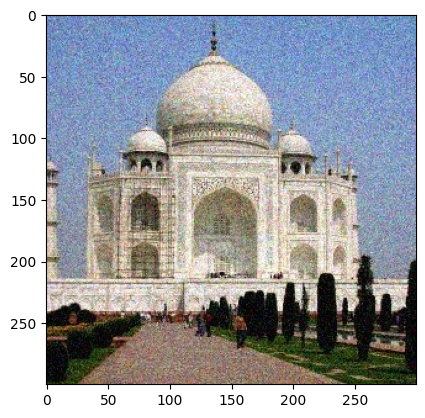

In [2]:
input_img = cv2.imread ('../images/taj-rgb-noise.jpg', 1)  #Best practise is to specify the flag you want set, confirming you want a colour picture.

img_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_RGB)

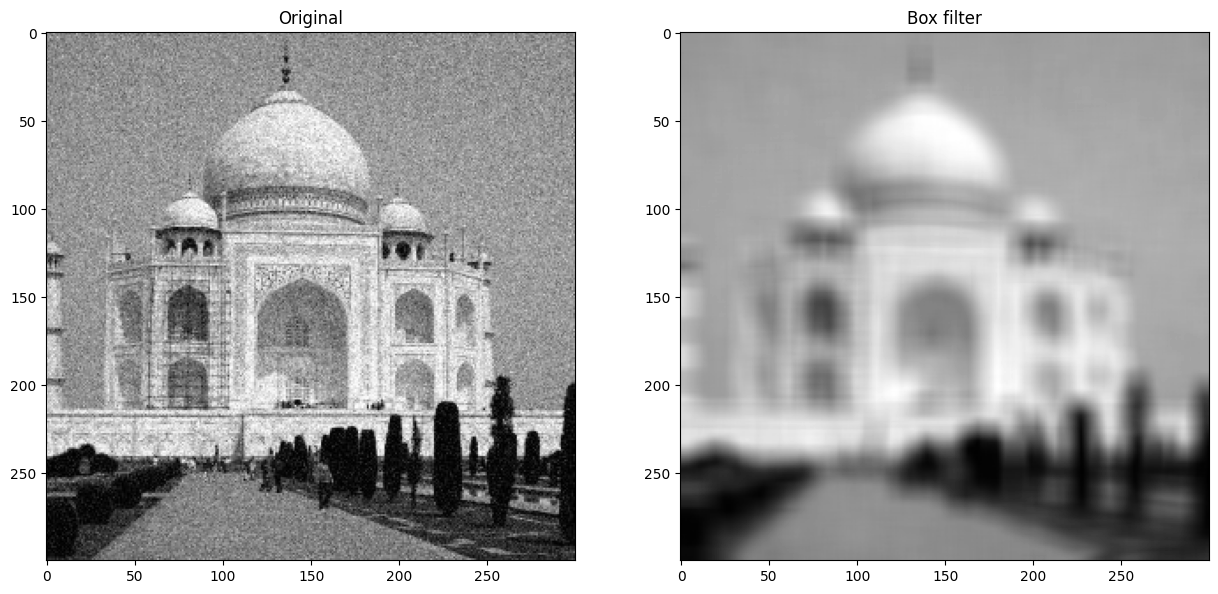

In [3]:
# box filter = averaging 
d = 7 # half kernel size 
blurred_box = cv2.blur(img, (2*d+1, 2*d+1))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 15))
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Original')
ax2.imshow(blurred_box, cmap='gray')
ax2.title.set_text('Box filter')

### 2. Gaussian Blurring

In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, cv.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

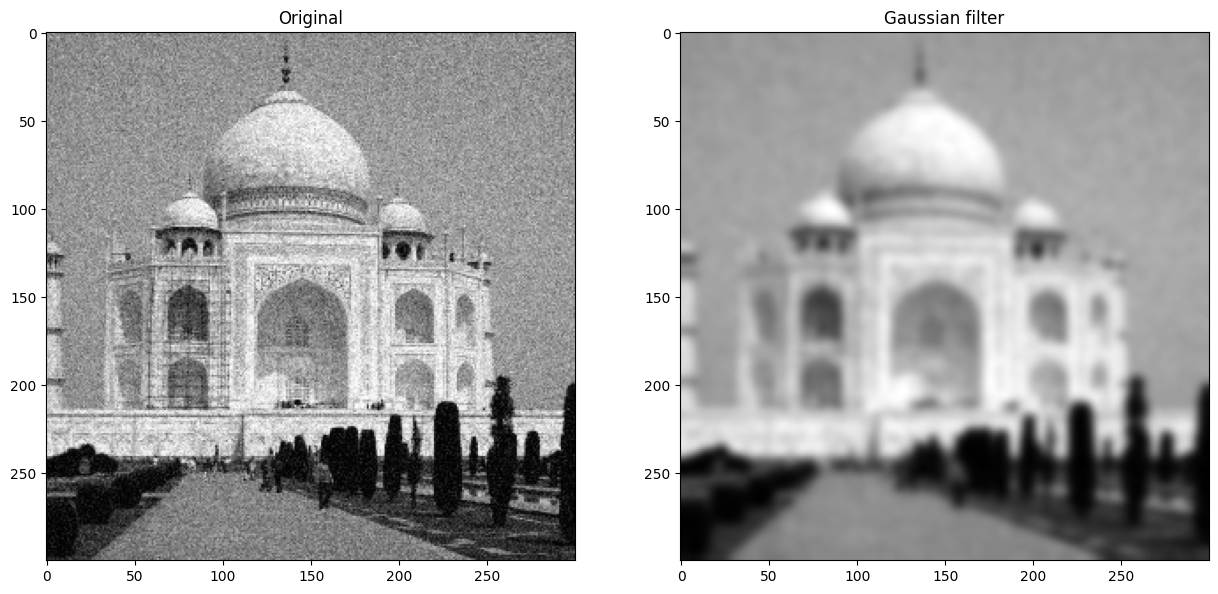

In [4]:
# Gaussian filter
d=7 # half kernel size 
blurred_Gaussian = cv2.GaussianBlur(img, (2*d+1, 2*d+1), sigmaX=0, sigmaY=0) # if sigma=0, it is calculated from the kernel size

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 15))
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Original')
ax2.imshow(blurred_Gaussian, cmap='gray')
ax2.title.set_text('Gaussian filter')

### 3. Bilateral Filtering

`cv.bilateralFilter()` is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

Filter size: Large filters (d > 5) are very slow, so it is recommended to use d=5 for real-time applications, and perhaps d=9 for offline applications that need heavy noise filtering.

Sigma values: For simplicity, you can set the 2 sigma values to be the same. If they are small (< 10), the filter will not have much effect, whereas if they are large (> 150), they will have a very strong effect, making the image look "cartoonish".

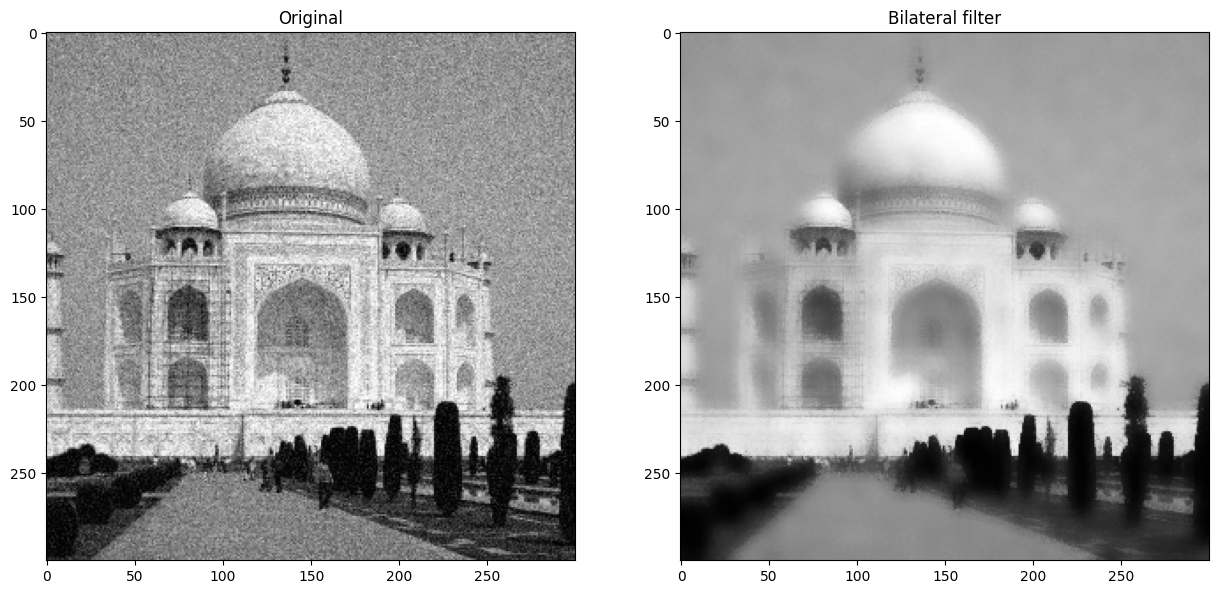

In [5]:
# bilateral filter
d=7 # half kernel size 
blurred_bilateral = cv2.bilateralFilter(img, d*2+1, sigmaColor=75, sigmaSpace=75)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 15))
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Original')
ax2.imshow(blurred_bilateral, cmap='gray')
ax2.title.set_text('Bilateral filter')

Let's finally compare the three smoothing techniques with the original zoomed in. Note the "ringing" effect that is clearly visible on the box filter result.

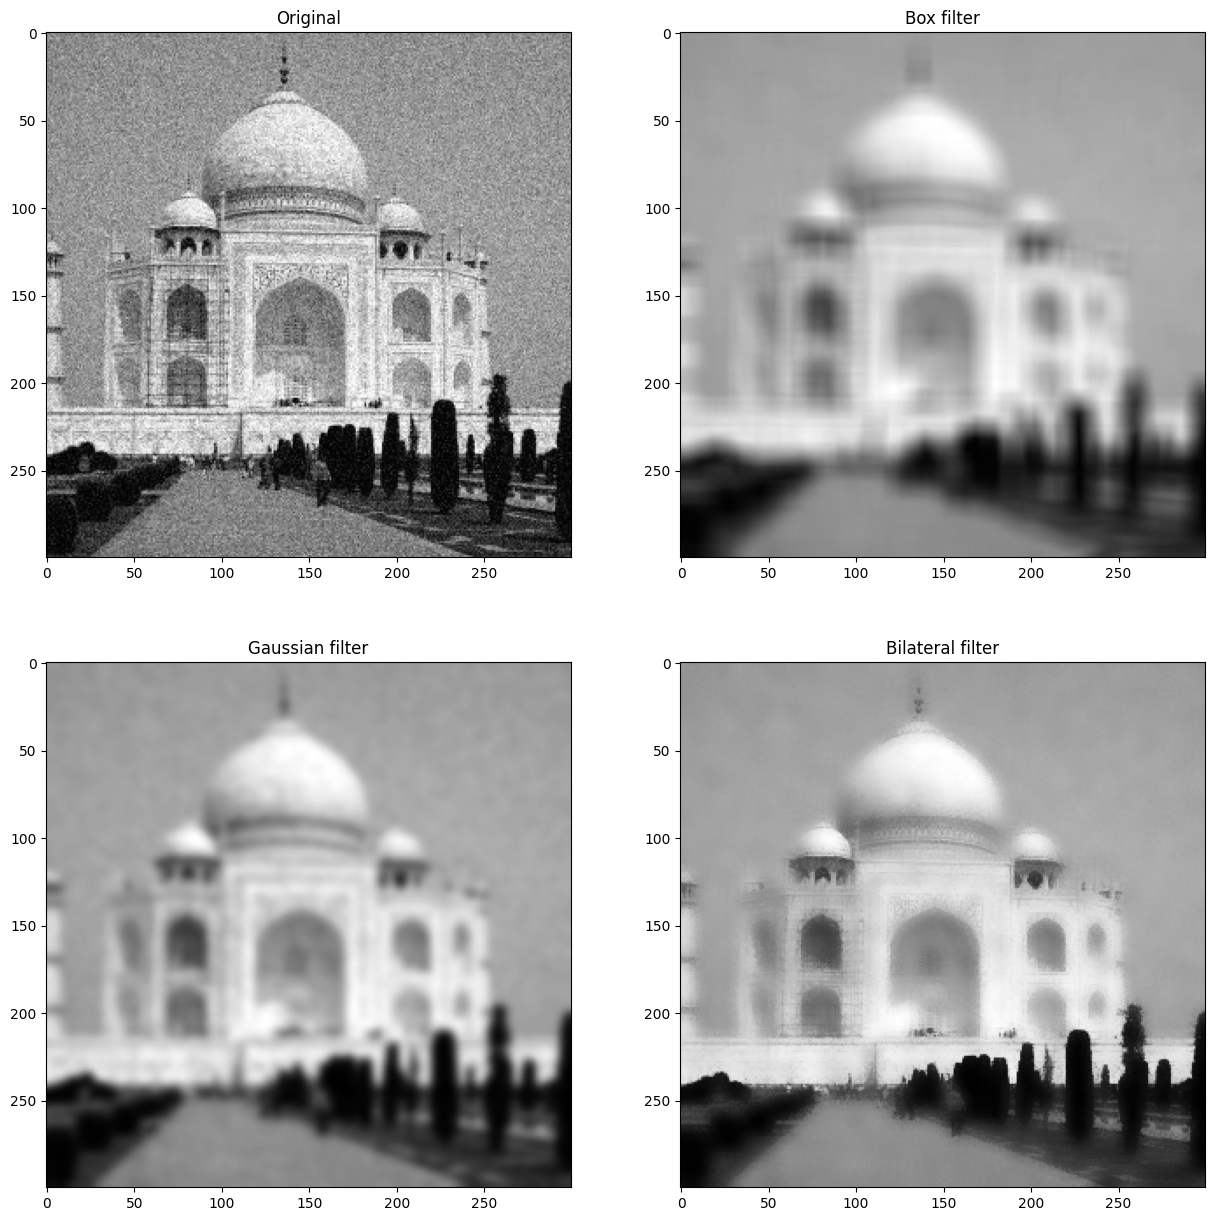

In [6]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 15))
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Original')
ax2.imshow(blurred_box, cmap='gray')
ax2.title.set_text('Box filter')
ax3.imshow(blurred_Gaussian, cmap='gray')
ax3.title.set_text('Gaussian filter')
ax4.imshow(blurred_bilateral, cmap='gray')
ax4.title.set_text('Bilateral filter')

### 4. Template Matching

OpenCV provides a method for finding a template in an image as follows:

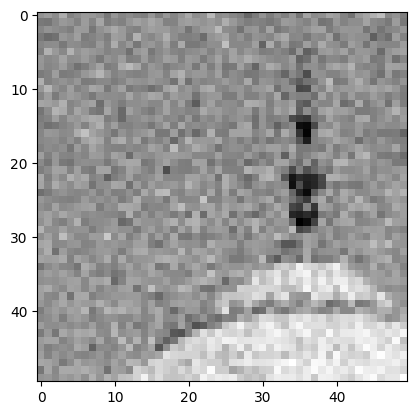

In [7]:
template_image = img[0:50, 100:150]
new_image = img.copy()
w,h = template_image.shape[::-1]
plt.imshow(template_image, 'gray')

[0] [100]


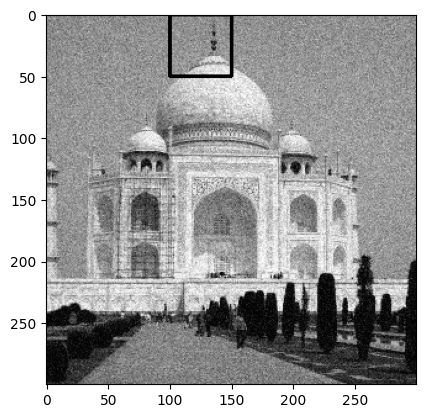

In [8]:
res = cv2.matchTemplate(img, template_image, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)


print(*loc)
for port in zip(*loc[::-1]):
    cv2.rectangle(new_image, port,(port[0] + w, port[1] + h), (0, 255, 255), 2)

plt.imshow(new_image, 'gray')